# CNN-CNN AUTOENCODER WITH UPSAMPLING

In [1]:
# IMPORTS
import numpy as np
import matplotlib.pyplot as plt
from main import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# MNIST DATASET
x_train, x_test, y_train, y_test = eda()
x_train.shape, y_train.shape

((60000, 28, 28, 1), (60000,))

In [3]:
# DIMENSIONALITY REDUCTION
dim = 2

In [5]:
# ENCODER
encoder = conv_encoder(x_train.shape[1:], 300, dim)
encoder.summary()

Model: "Conv-Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)              

In [6]:
# DECODER
decoder = conv_decoder(x_train.shape[1:], 300, dim)
decoder.summary()

Model: "Conv-Decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 300)               900       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 300)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 3136)              943936    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 3136)              0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 64)          0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 64)       

In [7]:
# AUTOENCODER
inp = Input(shape=x_train.shape[1:])
mid = encoder(inp)
out = decoder(mid)

model = Model(inp, out, name="Dense-AutoEncoder")
model.summary()

Model: "Dense-AutoEncoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
Conv-Encoder (Model)         (None, 2)                 960518    
_________________________________________________________________
Conv-Decoder (Model)         (None, 28, 28, 1)         1000517   
Total params: 1,961,035
Trainable params: 1,961,035
Non-trainable params: 0
_________________________________________________________________


In [8]:
# TRAINING
model.compile(loss="mse", optimizer=Adam(lr=0.0005))
model.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 123s 2ms/sample - loss: 0.0571 - val_loss: 0.0520
Epoch 2/20
60000/60000 [==============================] - 114s 2ms/sample - loss: 0.0489 - val_loss: 0.0458
Epoch 3/20
60000/60000 [==============================] - 114s 2ms/sample - loss: 0.0447 - val_loss: 0.0435
Epoch 4/20
60000/60000 [==============================] - 114s 2ms/sample - loss: 0.0429 - val_loss: 0.0420
Epoch 5/20
60000/60000 [==============================] - 115s 2ms/sample - loss: 0.0418 - val_loss: 0.0420
Epoch 6/20
60000/60000 [==============================] - 115s 2ms/sample - loss: 0.0412 - val_loss: 0.0410
Epoch 7/20
60000/60000 [==============================] - 115s 2ms/sample - loss: 0.0406 - val_loss: 0.0406
Epoch 8/20
60000/60000 [==============================] - 115s 2ms/sample - loss: 0.0402 - val_loss: 0.0405
Epoch 9/20
60000/60000 [==============================] - 115s 2ms/sample - loss: 0.03

In [9]:
# PREDICTIONS
yhat = model.predict(x_train)
yhat.shape

(60000, 28, 28, 1)

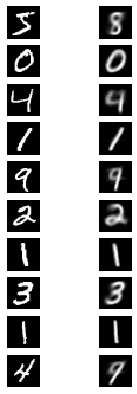

In [10]:
# ORIGINAL vs RECONSTRUCTED
n = 10
fig = plt.figure(figsize=(3, 7))
for i in range(n):
    before = x_train[i].squeeze()
    after = yhat[i].squeeze()
    ax = fig.add_subplot(n, 2, (i * 2) + 1)
    ax.imshow(before, cmap='gray')
    ax.axis('off')
    ax = fig.add_subplot(n, 2, (i * 2) + 2)
    ax.imshow(after, cmap='gray')
    ax.axis('off')

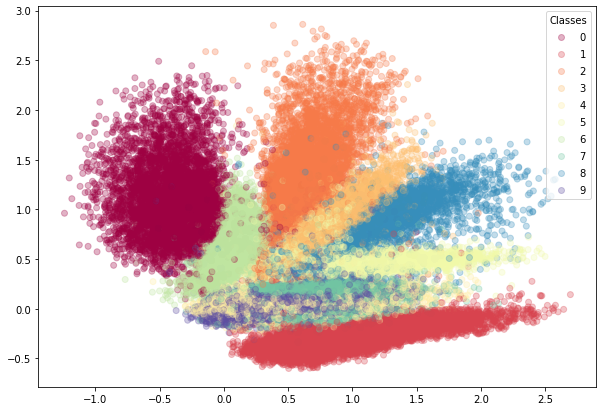

In [11]:
# LATENT SPACE
dim_2 = encoder.predict(x_train)
plt.figure(figsize=(10, 7))
scatter = plt.scatter(*dim_2.T, c=y_train, alpha=0.3, cmap='Spectral')
elements = scatter.legend_elements()
plt.legend(*elements, title='Classes');

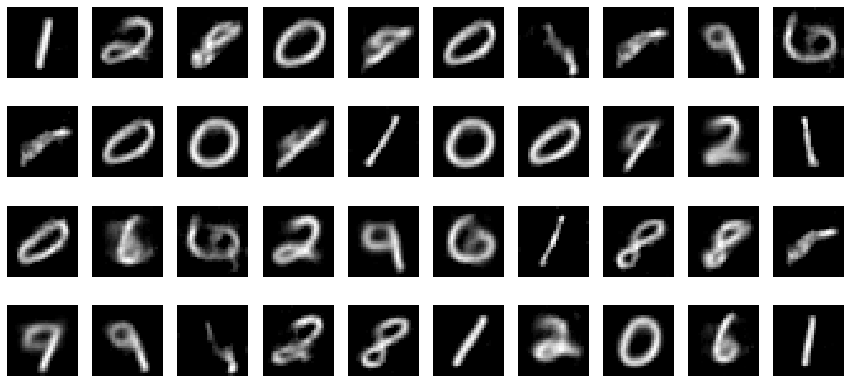

In [13]:
# GENERATING DIGITS BY SAMPLING FROM THE LATENT SPACE
fig = plt.figure(figsize=(15, 7))
for i in range(40):
    x, y = np.random.uniform(-1, 3, 2) # see graph above for potential values
    ax = fig.add_subplot(4, 10, i + 1)
    ax.imshow(decoder.predict([[x, y]]).reshape(28, 28), cmap='gray')
    ax.axis('off')

# END